In [1]:
import os

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
%reload_ext importnb
import GANstructure

Using TensorFlow backend.


In [5]:
path='../data/camel/full_numpy_bitmap_camel.npy'

In [6]:
RUN_FOLDER='run/'
if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER,'images'))
    os.mkdir(os.path.join(RUN_FOLDER,'weights'))

In [7]:
def loader(path):
    dataset_size=5000
    dataset=np.load(path)
    no_of_images=dataset.shape[0]
    dataset=dataset.reshape(no_of_images,28,28,1)
    dataset=dataset[:dataset_size]
    dataset = dataset.astype('float32') / 255.0
    '''
    test 1
    arr = np.arange(10)
    np.random.shuffle(arr)
    print(arr)
    '''
    np.random.shuffle(dataset)
   
    return dataset

In [8]:
x=loader(path)
x=np.squeeze(x)

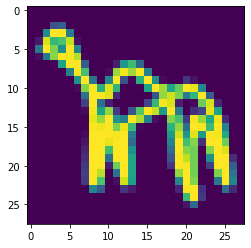

In [9]:
plt.imshow(x[50])
plt.show()

In [10]:
gan = GANstructure.GAN(input_dims = (28,28,1)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_activation = 'relu'
        , discriminator_dropout = 0.4
        , discriminator_lr = 0.0008
        , generator_initial_dense_layer_size = (7, 7, 64)
        , generator_upsample = [2,2,1,1]
        , generator_conv_filters = [128,64, 64,1]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [1,1, 1, 1]
        , generator_activation = 'relu'
        , generator_dropout = None
        , generator_lr = 0.0004
        , optimizer = 'rmsprop'
        , latent_dims = 100
        )

In [11]:
gan.discriminator.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 28, 28, 1)         0         
_________________________________________________________________
discriminator_layer_0 (Conv2 (None, 14, 14, 64)        1664      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
discriminator_layer_1 (Conv2 (None, 7, 7, 64)          102464    
_________________________________________________________________
activation_2 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0   

In [12]:
gan.generator.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3136)              316736    
_________________________________________________________________
activation_5 (Activation)    (None, 3136)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 64)        0         
_________________________________________________________________
generator_layer_0 (Conv2D)   (None, 14, 14, 128)       204928    
_________________________________________________________________
activation_6 (Activation)    (None, 14, 14, 128)       0   

In [13]:
BATCH_SIZE = 64
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5

In [14]:
dataset=loader(path)

In [15]:
x_train=dataset[:4000]

In [16]:
gan.train(x_train, batch_size = BATCH_SIZE, epochs = EPOCHS, run_folder = RUN_FOLDER, 
          print_every_n_batch = PRINT_EVERY_N_BATCHES
)



D:\Data\appData2\anaconda3\envs\gans\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: (0.967)(R 0.698, F 1.236)] [D acc: (0.164)(0.328, 0.000)] [G loss: 0.688] [G acc: 1.000]


D:\Data\appData2\anaconda3\envs\gans\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: (0.708)(R 0.680, F 0.736)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.680] [G acc: 1.000]
2 [D loss: (0.697)(R 0.684, F 0.710)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.685] [G acc: 1.000]
3 [D loss: (0.694)(R 0.683, F 0.705)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.690] [G acc: 0.844]
4 [D loss: (0.692)(R 0.683, F 0.702)] [D acc: (0.508)(1.000, 0.016)] [G loss: 0.696] [G acc: 0.234]
5 [D loss: (0.689)(R 0.680, F 0.698)] [D acc: (0.594)(1.000, 0.188)] [G loss: 0.712] [G acc: 0.000]
6 [D loss: (0.688)(R 0.670, F 0.705)] [D acc: (0.578)(1.000, 0.156)] [G loss: 0.759] [G acc: 0.000]
7 [D loss: (0.649)(R 0.666, F 0.631)] [D acc: (0.977)(0.953, 1.000)] [G loss: 1.096] [G acc: 0.000]
8 [D loss: (1.433)(R 0.516, F 2.350)] [D acc: (0.500)(1.000, 0.000)] [G loss: 1.382] [G acc: 0.000]
9 [D loss: (0.463)(R 0.621, F 0.306)] [D acc: (0.938)(0.875, 1.000)] [G loss: 2.533] [G acc: 0.000]
10 [D loss: (0.301)(R 0.512, F 0.090)] [D acc: (0.930)(0.859, 1.000)] [G loss: 4.323] [G acc: 0.000]

85 [D loss: (0.095)(R 0.164, F 0.025)] [D acc: (0.969)(0.938, 1.000)] [G loss: 4.111] [G acc: 0.000]
86 [D loss: (0.060)(R 0.070, F 0.049)] [D acc: (0.992)(0.984, 1.000)] [G loss: 3.817] [G acc: 0.016]
87 [D loss: (0.957)(R 0.110, F 1.803)] [D acc: (0.711)(0.953, 0.469)] [G loss: 8.012] [G acc: 0.000]
88 [D loss: (1.794)(R 2.582, F 1.006)] [D acc: (0.227)(0.016, 0.438)] [G loss: 1.675] [G acc: 0.062]
89 [D loss: (0.728)(R 0.290, F 1.167)] [D acc: (0.609)(0.969, 0.250)] [G loss: 1.371] [G acc: 0.016]
90 [D loss: (0.467)(R 0.393, F 0.540)] [D acc: (0.836)(0.938, 0.734)] [G loss: 1.315] [G acc: 0.078]
91 [D loss: (0.440)(R 0.332, F 0.547)] [D acc: (0.844)(0.922, 0.766)] [G loss: 3.748] [G acc: 0.000]
92 [D loss: (0.551)(R 0.459, F 0.642)] [D acc: (0.719)(0.828, 0.609)] [G loss: 1.557] [G acc: 0.000]
93 [D loss: (0.409)(R 0.344, F 0.473)] [D acc: (0.859)(0.906, 0.812)] [G loss: 2.420] [G acc: 0.000]
94 [D loss: (0.365)(R 0.277, F 0.453)] [D acc: (0.883)(0.953, 0.812)] [G loss: 6.467] [G ac

167 [D loss: (0.387)(R 0.395, F 0.379)] [D acc: (0.852)(0.844, 0.859)] [G loss: 3.981] [G acc: 0.000]
168 [D loss: (0.370)(R 0.560, F 0.181)] [D acc: (0.828)(0.688, 0.969)] [G loss: 5.764] [G acc: 0.000]
169 [D loss: (0.246)(R 0.253, F 0.240)] [D acc: (0.930)(0.906, 0.953)] [G loss: 2.619] [G acc: 0.000]
170 [D loss: (0.202)(R 0.123, F 0.281)] [D acc: (0.945)(0.953, 0.938)] [G loss: 3.188] [G acc: 0.000]
171 [D loss: (0.276)(R 0.231, F 0.322)] [D acc: (0.875)(0.875, 0.875)] [G loss: 3.514] [G acc: 0.000]
172 [D loss: (0.554)(R 0.485, F 0.622)] [D acc: (0.656)(0.656, 0.656)] [G loss: 3.448] [G acc: 0.000]
173 [D loss: (0.545)(R 0.637, F 0.453)] [D acc: (0.734)(0.656, 0.812)] [G loss: 3.622] [G acc: 0.000]
174 [D loss: (0.442)(R 0.552, F 0.332)] [D acc: (0.789)(0.672, 0.906)] [G loss: 3.707] [G acc: 0.000]
175 [D loss: (0.399)(R 0.337, F 0.461)] [D acc: (0.797)(0.812, 0.781)] [G loss: 2.887] [G acc: 0.000]
176 [D loss: (0.351)(R 0.318, F 0.384)] [D acc: (0.867)(0.906, 0.828)] [G loss: 2.

250 [D loss: (0.290)(R 0.212, F 0.369)] [D acc: (0.891)(0.938, 0.844)] [G loss: 3.482] [G acc: 0.000]
251 [D loss: (0.275)(R 0.317, F 0.233)] [D acc: (0.898)(0.844, 0.953)] [G loss: 3.649] [G acc: 0.000]
252 [D loss: (0.311)(R 0.257, F 0.365)] [D acc: (0.891)(0.922, 0.859)] [G loss: 4.312] [G acc: 0.000]
253 [D loss: (0.237)(R 0.246, F 0.228)] [D acc: (0.891)(0.875, 0.906)] [G loss: 4.139] [G acc: 0.000]
254 [D loss: (0.295)(R 0.284, F 0.306)] [D acc: (0.883)(0.906, 0.859)] [G loss: 4.384] [G acc: 0.000]
255 [D loss: (0.348)(R 0.493, F 0.204)] [D acc: (0.852)(0.781, 0.922)] [G loss: 5.136] [G acc: 0.000]
256 [D loss: (0.318)(R 0.179, F 0.458)] [D acc: (0.836)(0.938, 0.734)] [G loss: 5.646] [G acc: 0.000]
257 [D loss: (0.390)(R 0.562, F 0.217)] [D acc: (0.836)(0.750, 0.922)] [G loss: 4.095] [G acc: 0.000]
258 [D loss: (0.252)(R 0.122, F 0.382)] [D acc: (0.898)(0.969, 0.828)] [G loss: 4.219] [G acc: 0.000]
259 [D loss: (0.294)(R 0.407, F 0.180)] [D acc: (0.875)(0.812, 0.938)] [G loss: 4.

331 [D loss: (0.248)(R 0.186, F 0.310)] [D acc: (0.883)(0.906, 0.859)] [G loss: 4.371] [G acc: 0.016]
332 [D loss: (0.404)(R 0.432, F 0.376)] [D acc: (0.828)(0.750, 0.906)] [G loss: 4.192] [G acc: 0.031]
333 [D loss: (0.247)(R 0.161, F 0.333)] [D acc: (0.898)(0.969, 0.828)] [G loss: 4.457] [G acc: 0.000]
334 [D loss: (0.270)(R 0.443, F 0.098)] [D acc: (0.922)(0.859, 0.984)] [G loss: 3.906] [G acc: 0.016]
335 [D loss: (0.298)(R 0.175, F 0.421)] [D acc: (0.875)(0.906, 0.844)] [G loss: 4.626] [G acc: 0.000]
336 [D loss: (0.406)(R 0.380, F 0.432)] [D acc: (0.820)(0.812, 0.828)] [G loss: 4.103] [G acc: 0.016]
337 [D loss: (0.310)(R 0.398, F 0.222)] [D acc: (0.867)(0.812, 0.922)] [G loss: 3.583] [G acc: 0.031]
338 [D loss: (0.361)(R 0.302, F 0.419)] [D acc: (0.820)(0.891, 0.750)] [G loss: 3.852] [G acc: 0.016]
339 [D loss: (0.380)(R 0.469, F 0.290)] [D acc: (0.844)(0.812, 0.875)] [G loss: 3.924] [G acc: 0.000]
340 [D loss: (0.254)(R 0.237, F 0.270)] [D acc: (0.930)(0.969, 0.891)] [G loss: 3.

KeyboardInterrupt: 